 # Intro Data Analysis with Python

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [8]:
df = pd.read_csv(r"C:\Users\GaryNico\Downloads\Dataset\pima-indians-diabetes-database\diabetes.csv")

## Basic Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
for col in df.columns:
    print(col)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [33]:
X = df.drop("Outcome", axis = 1) # x adalah feature
y = df["Outcome"] # y adalah label

In [34]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Jumlah terdiagnosis sehat:  500
Jumlah terdiagnosis diabetes:  268


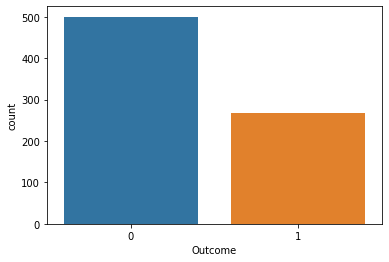

In [29]:
ax = sns.countplot(y, label = "Count")
S, D = y.value_counts()
print("Jumlah terdiagnosis sehat: ", S)
print("Jumlah terdiagnosis diabetes: ", D)
plt.show()

In [35]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Feature Selection with Data Visualization

In [ ]:
# Normalization = rescale data ke nilai [0.1]. Outlier data akan menjadi bias karena memiliki max 1
# Standardization = rescale data sehingga memiliki mean 0 dan unit variance

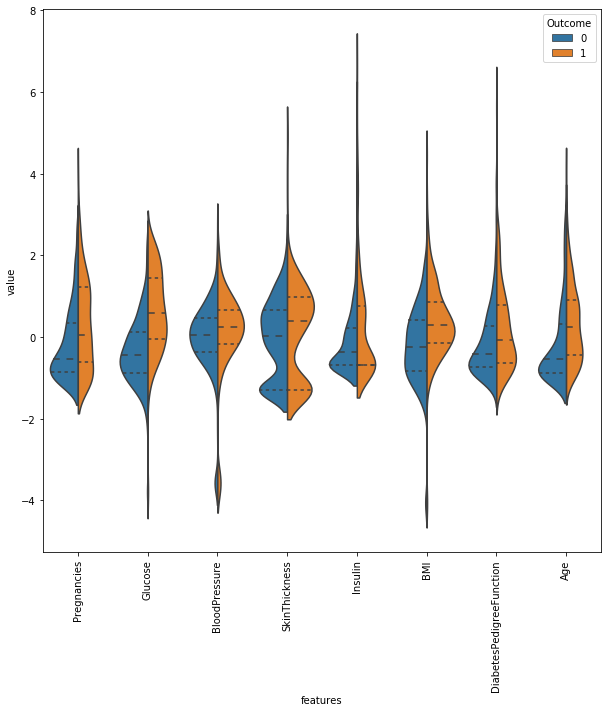

In [44]:
data_standardized = (X - X.mean()) / X.std()
data = pd.concat([y, data_standardized], axis = 1)
data = pd.melt(data, id_vars = "Outcome", var_name = "features", value_name = "value")
plt.figure(figsize = (10,10))
sns.violinplot(x = "features", y = "value", hue = "Outcome", data = data, split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.show()

## Data Correlation (Feature Selection)

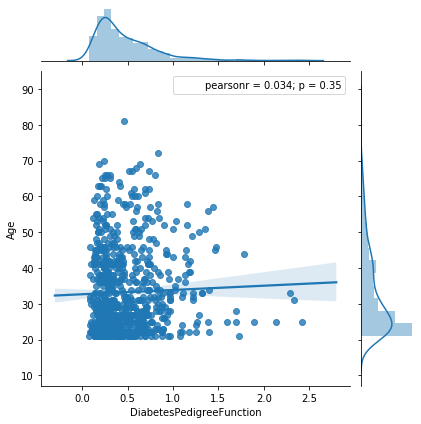

In [53]:
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

# karena dari violin plot mirip, maka di check apakah ada correlation antara predigree dan age
p = sns.jointplot(X.loc[:,'DiabetesPedigreeFunction'], X.loc[:,'Age'], kind = 'regg')
p.annotate(stats.pearsonr)
plt.show()

# ternyata person value sangat kecil maka kedua feature tidak terkorelasi

In [68]:
sns.set(style = "whitegrid", palette = "muted")
data_standardized = (X - X.mean()) / X.std()
data = pd.concat([y,data_standardized], axis = 1)
data = pd.melt(data, id_vars = "Outcome", var_name = "features", value_name = "value")

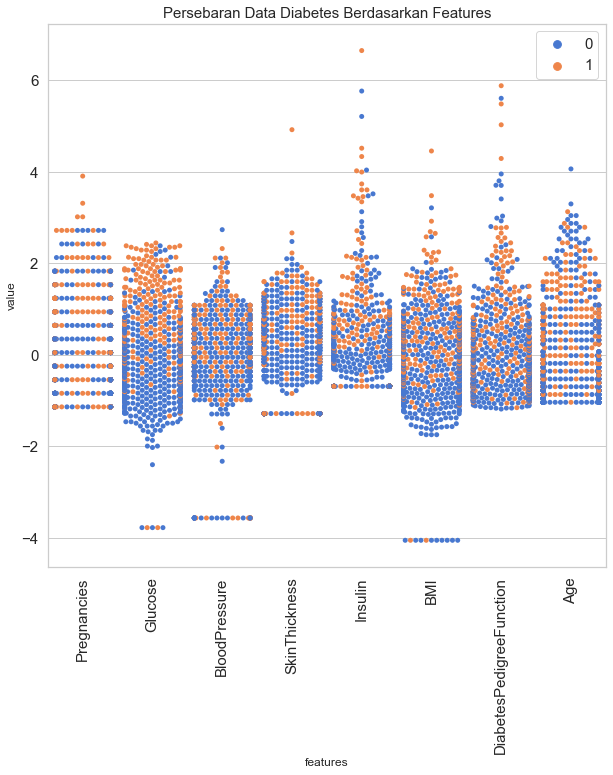

In [72]:
plt.figure(figsize = (10,10))
tic = time.time()
sns.swarmplot(x= "features", y = "value", hue = "Outcome", data = data)
plt.title("Persebaran Data Diabetes Berdasarkan Features", fontsize = 15)
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation = 90,fontsize=15)
plt.show()

# Feature glucose yang berguna dalam problem klasifikasi ini, karena
# bola-bolanya terpisah jelas 

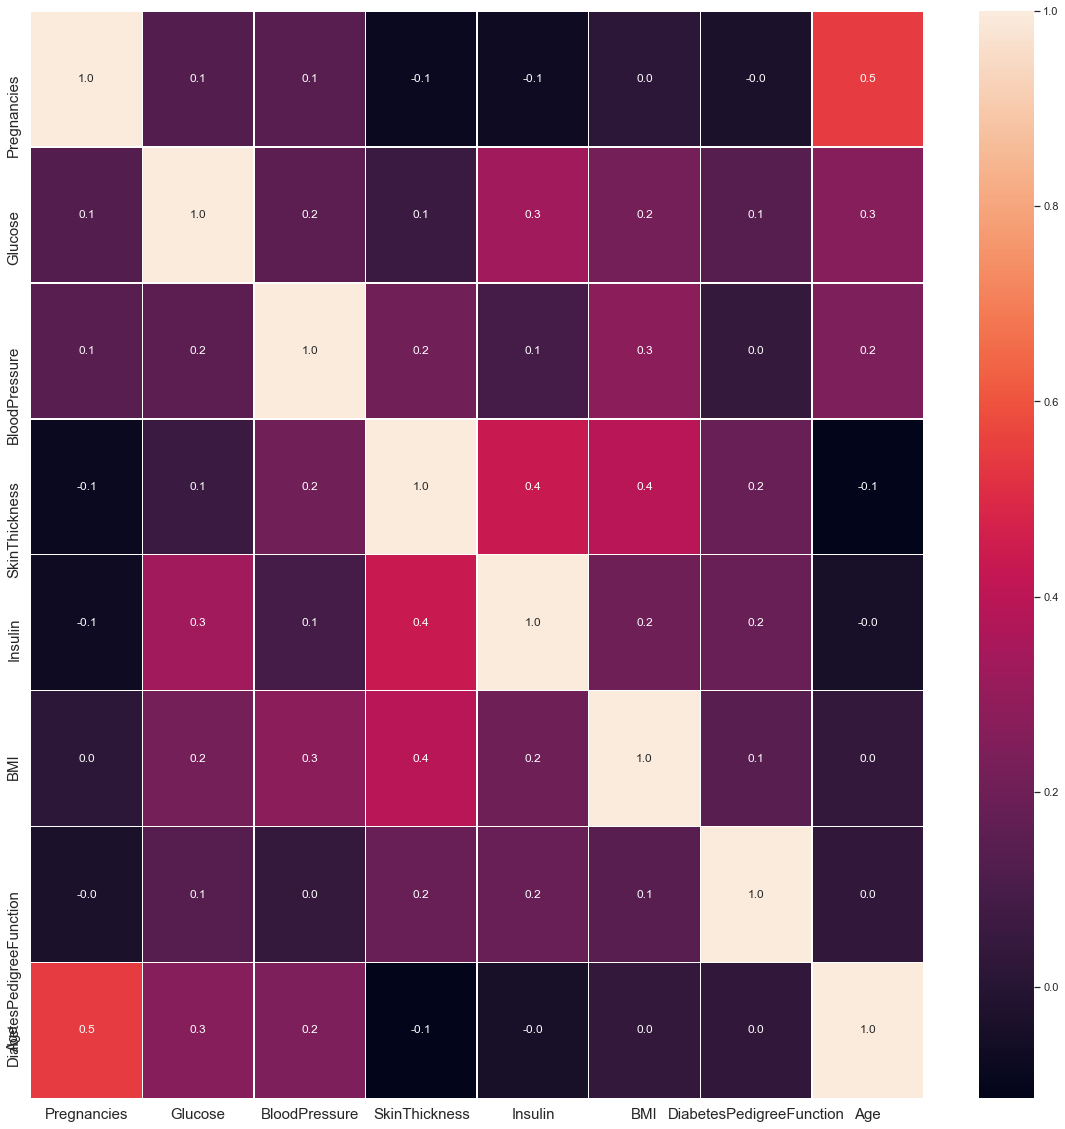

In [73]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(X.corr(), annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()